In [1]:
import pandas as pd

weather = pd.read_csv("D:/insurance.csv", index_col="Date")

In [2]:
weather

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
Date,,,,,,,,,
1/1/2019,19,0,27.900,3009,0,1,3,16884.92400,1
1/2/2019,18,1,33.770,3008,1,0,2,1725.55230,1
1/3/2019,28,1,33.000,3009,3,0,2,4449.46200,0
1/4/2019,33,1,22.705,10009,0,0,1,21984.47061,0
1/5/2019,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
8/26/2022,50,1,30.970,4008,3,0,1,10600.54830,0
8/27/2022,18,0,31.920,3003,0,0,0,2205.98080,1
8/28/2022,18,0,36.850,3008,0,0,2,1629.83350,1


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

age               0.0
sex               0.0
bmi               0.0
steps             0.0
children          0.0
smoker            0.0
region            0.0
charges           0.0
insuranceclaim    0.0
dtype: float64

In [4]:
valid_columns = weather.columns[null_pct < .05]

In [5]:
valid_columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
weather =  weather[valid_columns].copy()

In [7]:
weather.columns = weather.columns.str.lower()

In [8]:
weather

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
Date,,,,,,,,,
1/1/2019,19,0,27.900,3009,0,1,3,16884.92400,1
1/2/2019,18,1,33.770,3008,1,0,2,1725.55230,1
1/3/2019,28,1,33.000,3009,3,0,2,4449.46200,0
1/4/2019,33,1,22.705,10009,0,0,1,21984.47061,0
1/5/2019,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
8/26/2022,50,1,30.970,4008,3,0,1,10600.54830,0
8/27/2022,18,0,31.920,3003,0,0,0,2205.98080,1
8/28/2022,18,0,36.850,3008,0,0,2,1629.83350,1


In [9]:
weather =  weather.ffill()
weather.apply(pd.isnull).sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [10]:
weather.dtypes

age                 int64
sex                 int64
bmi               float64
steps               int64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [11]:
weather.index

Index(['1/1/2019', '1/2/2019', '1/3/2019', '1/4/2019', '1/5/2019', '1/6/2019',
       '1/7/2019', '1/8/2019', '1/9/2019', '1/10/2019',
       ...
       '8/21/2022', '8/22/2022', '8/23/2022', '8/24/2022', '8/25/2022',
       '8/26/2022', '8/27/2022', '8/28/2022', '8/29/2022', '8/30/2022'],
      dtype='object', name='Date', length=1338)

In [12]:
weather.index = pd.to_datetime(weather.index)

In [13]:
weather.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30'],
              dtype='datetime64[ns]', name='Date', length=1338, freq=None)

In [14]:
weather.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Date', length=1338)

In [15]:
weather.index.year.value_counts().sort_index()

2019    365
2020    366
2021    365
2022    242
Name: Date, dtype: int64

<AxesSubplot:xlabel='Date'>

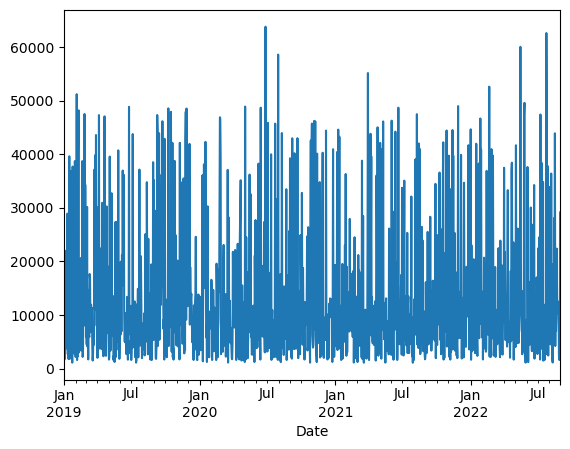

In [16]:
weather["charges"].plot()


<AxesSubplot:xlabel='Date'>

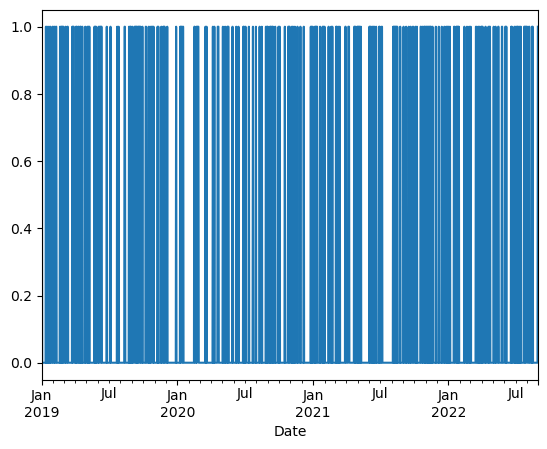

In [17]:
weather["smoker"].plot()


In [18]:
weather["target"] = weather.shift(-1)["insuranceclaim"]

In [19]:
weather

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,target
Date,,,,,,,,,,
2019-01-01,19,0,27.900,3009,0,1,3,16884.92400,1,1.0
2019-01-02,18,1,33.770,3008,1,0,2,1725.55230,1,0.0
2019-01-03,28,1,33.000,3009,3,0,2,4449.46200,0,0.0
2019-01-04,33,1,22.705,10009,0,0,1,21984.47061,0,1.0
2019-01-05,32,1,28.880,8010,0,0,1,3866.85520,1,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-08-26,50,1,30.970,4008,3,0,1,10600.54830,0,1.0
2022-08-27,18,0,31.920,3003,0,0,0,2205.98080,1,1.0
2022-08-28,18,0,36.850,3008,0,0,2,1629.83350,1,0.0


In [20]:
weather = weather.ffill()

In [21]:
weather

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,target
Date,,,,,,,,,,
2019-01-01,19,0,27.900,3009,0,1,3,16884.92400,1,1.0
2019-01-02,18,1,33.770,3008,1,0,2,1725.55230,1,0.0
2019-01-03,28,1,33.000,3009,3,0,2,4449.46200,0,0.0
2019-01-04,33,1,22.705,10009,0,0,1,21984.47061,0,1.0
2019-01-05,32,1,28.880,8010,0,0,1,3866.85520,1,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-08-26,50,1,30.970,4008,3,0,1,10600.54830,0,1.0
2022-08-27,18,0,31.920,3003,0,0,0,2205.98080,1,1.0
2022-08-28,18,0,36.850,3008,0,0,2,1629.83350,1,0.0


In [22]:
weather.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,target
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723,0.007550
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565,-0.013946
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198,-0.015809
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514,-0.003919
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526,-0.024322
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261,0.006220
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891,-0.029927
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418,0.008887
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000,0.008581
target,0.007550,-0.013946,-0.015809,-0.003919,-0.024322,0.006220,-0.029927,0.008887,0.008581,1.000000


In [23]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [24]:
predictors = weather.columns[~weather.columns.isin([])]

In [25]:
predictors

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim', 'target'],
      dtype='object')

In [29]:
def backtest(weather, model, predictors, start=100, step=50):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat([test["target"], preds], axis=1)
        
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [40]:
predictions = round(backtest(weather,rr,predictors))

In [41]:
predictions

,actual,prediction,diff
Date,,,
2019-04-11,0.0,0.0,0.0
2019-04-12,1.0,1.0,0.0
2019-04-13,1.0,1.0,0.0
2019-04-14,0.0,0.0,0.0
2019-04-15,1.0,1.0,0.0
...,...,...,...
2022-08-26,1.0,1.0,0.0
2022-08-27,1.0,1.0,0.0
2022-08-28,0.0,0.0,0.0


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.0

In [43]:
predictions["diff"].mean()

0.0

In [44]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
2019-04-11,0.0,0.0,0.0
2021-07-12,0.0,0.0,0.0
2021-07-19,1.0,1.0,0.0
2021-07-18,1.0,1.0,0.0
2021-07-17,1.0,1.0,0.0
...,...,...,...
2020-05-26,0.0,0.0,0.0
2020-05-25,1.0,1.0,0.0
2020-05-24,1.0,1.0,0.0


In [45]:
mean_squared_error(predictions["actual"], predictions["prediction"])


0.0

In [46]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
2019-04-11,0.0,0.0,0.0
2021-07-12,0.0,0.0,0.0
2021-07-19,1.0,1.0,0.0
2021-07-18,1.0,1.0,0.0
2021-07-17,1.0,1.0,0.0
...,...,...,...
2020-05-26,0.0,0.0,0.0
2020-05-25,1.0,1.0,0.0
2020-05-24,1.0,1.0,0.0


,actual,prediction,diff
Date,,,
2019-04-11,0.0,0.0,0.0
2019-04-12,1.0,1.0,0.0
2019-04-13,1.0,1.0,0.0
2019-04-14,0.0,0.0,0.0
2019-04-15,1.0,1.0,0.0
...,...,...,...
2022-08-26,1.0,1.0,0.0
2022-08-27,1.0,1.0,0.0
2022-08-28,0.0,0.0,0.0


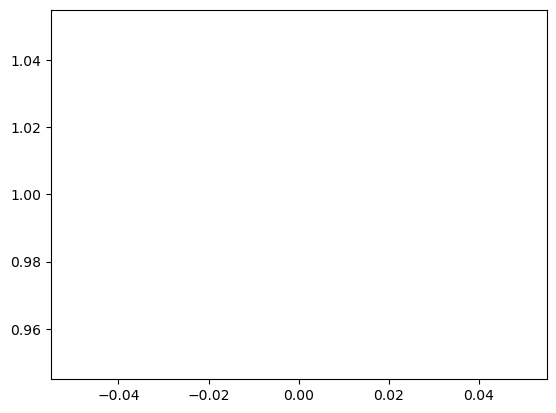

In [47]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()
predictions

In [48]:
pd.Series(rr.coef_, index=predictors)

age              -1.149960e-07
sex              -5.915305e-06
bmi              -7.590271e-07
steps            -2.287280e-09
children         -2.328357e-06
smoker           -7.977519e-06
region           -3.448907e-06
charges           4.026118e-10
insuranceclaim   -9.229236e-07
target            9.996826e-01
dtype: float64